In [10]:
import deeptrack as dt 
from numpy.random import uniform
import numpy as np
from Moon import Moon
from Star import Star
from matplotlib import pyplot as plt
from torch.utils.data import ConcatDataset
import torch

image_size = 32

particle_F = dt.Ellipse(
            intensity = 5.0,
            position_unit="pixel",
            position=lambda: uniform(image_size / 2 - 5, image_size / 2 + 5, size=2),
            radius=(1, 16)*dt.units.pixel,
            rotation=lambda: np.random.uniform(0, 2 * np.pi),   
        )

optics = dt.Fluorescence(output_region=(0, 0, image_size, image_size))

simulation_F = (
    optics(particle_F) 
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

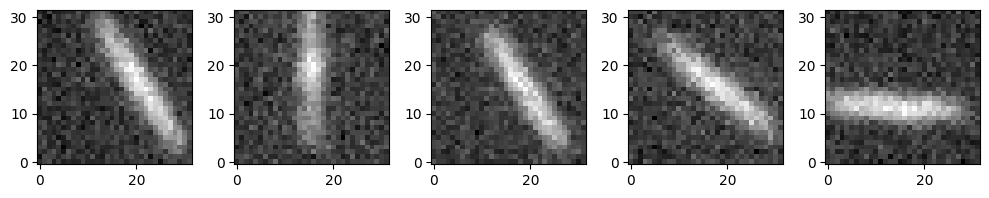

In [11]:
train_dataset_F = dt.pytorch.Dataset(simulation_F & [0], length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, lab  = train_dataset_F[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()